In [1]:
import numpy as np 
import pandas as pd 
import os
import glob
import cv2
import random
import sys
import shutil
import re
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib import cm
from os import path
from PIL import Image
from keras.models import Model
from keras.layers import Input, concatenate, Conv2D, MaxPooling2D, Conv2DTranspose
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from keras import optimizers
from keras.utils import to_categorical, plot_model
from keras.layers import Dense, Input, Conv2D, Flatten, MaxPooling2D, Activation
from keras.models import Model, Sequential
from keras.layers import Activation, Dropout, Flatten, Dense
from keras.callbacks import ModelCheckpoint
from keras.optimizers import Adam, SGD, RMSprop
from keras.applications.vgg16 import VGG16
from keras.models import load_model
from keras.utils import np_utils

Using TensorFlow backend.
C:\Users\subah\anaconda3\envs\py36\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\subah\anaconda3\envs\py36\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\subah\anaconda3\envs\py36\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\subah\anaconda3\envs\py36\lib\site-packag

In [2]:
PATH_DRIVE = './All_3/DRIVE/training'

In [3]:
images_DRIVE=glob.glob(os.path.join(PATH_DRIVE,'images','*.TIF'))
mask_DRIVE=glob.glob(os.path.join(PATH_DRIVE,'1st_manual','*.GIF'))
if not os.path.exists('./All_3/training/output_images'):
    os.makedirs('./All_3/training/output_images')
if not os.path.exists('./All_3/training/output_1st_manual'):
    os.makedirs('./All_3/training/output_1st_manual')
src = "./All_3/DRIVE/training/images/"
dst = "./All_3/training/output_images/"
src1= "./All_3/DRIVE/training/1st_manual/"
dst1 = "./All_3/training/output_1st_manual/"

In [4]:
cropheight=200
cropwidth = 200
k=-1
for file in images_DRIVE:
    k+=1
    im = Image.open(images_DRIVE[k])
    width, height = im.size
    for i in range(0, width, cropwidth):
     for j in range(0, height, cropheight): 
       box = (i, j,i+cropwidth, j+cropheight)
       print('%s %s' % (images_DRIVE[k], box))
       im.crop(box).save('%s.width%03d.height%03d.tiff' % (images_DRIVE[k], i, j))
       files = [i for i in os.listdir(src) if i.endswith(".tiff") and path.isfile(path.join(src, i))]
       for f in files:
        shutil.move(path.join(src, f), dst)

./All_3/DRIVE/training\images\21_training.tif (0, 0, 200, 200)
./All_3/DRIVE/training\images\21_training.tif (0, 200, 200, 400)
./All_3/DRIVE/training\images\21_training.tif (0, 400, 200, 600)
./All_3/DRIVE/training\images\21_training.tif (200, 0, 400, 200)
./All_3/DRIVE/training\images\21_training.tif (200, 200, 400, 400)
./All_3/DRIVE/training\images\21_training.tif (200, 400, 400, 600)
./All_3/DRIVE/training\images\21_training.tif (400, 0, 600, 200)
./All_3/DRIVE/training\images\21_training.tif (400, 200, 600, 400)
./All_3/DRIVE/training\images\21_training.tif (400, 400, 600, 600)
./All_3/DRIVE/training\images\22_training.tif (0, 0, 200, 200)
./All_3/DRIVE/training\images\22_training.tif (0, 200, 200, 400)
./All_3/DRIVE/training\images\22_training.tif (0, 400, 200, 600)
./All_3/DRIVE/training\images\22_training.tif (200, 0, 400, 200)
./All_3/DRIVE/training\images\22_training.tif (200, 200, 400, 400)
./All_3/DRIVE/training\images\22_training.tif (200, 400, 400, 600)
./All_3/DRIVE/tra

./All_3/DRIVE/training\images\38_training.tif (400, 400, 600, 600)
./All_3/DRIVE/training\images\39_training.tif (0, 0, 200, 200)
./All_3/DRIVE/training\images\39_training.tif (0, 200, 200, 400)
./All_3/DRIVE/training\images\39_training.tif (0, 400, 200, 600)
./All_3/DRIVE/training\images\39_training.tif (200, 0, 400, 200)
./All_3/DRIVE/training\images\39_training.tif (200, 200, 400, 400)
./All_3/DRIVE/training\images\39_training.tif (200, 400, 400, 600)
./All_3/DRIVE/training\images\39_training.tif (400, 0, 600, 200)
./All_3/DRIVE/training\images\39_training.tif (400, 200, 600, 400)
./All_3/DRIVE/training\images\39_training.tif (400, 400, 600, 600)
./All_3/DRIVE/training\images\40_training.tif (0, 0, 200, 200)
./All_3/DRIVE/training\images\40_training.tif (0, 200, 200, 400)
./All_3/DRIVE/training\images\40_training.tif (0, 400, 200, 600)
./All_3/DRIVE/training\images\40_training.tif (200, 0, 400, 200)
./All_3/DRIVE/training\images\40_training.tif (200, 200, 400, 400)
./All_3/DRIVE/tra

In [5]:
cropheight=200
cropwidth = 200
k=-1
for file in mask_DRIVE:
    k+=1
    im = Image.open(mask_DRIVE[k])
    width, height = im.size
    for i in range(0, width, cropwidth):
     for j in range(0, height, cropheight): 
       box = (i, j,i+cropwidth, j+cropheight)
       print('%s %s' % (mask_DRIVE[k], box))
       im.crop(box).save('%s.width%03d.height%03d.jpg' % (mask_DRIVE[k], i, j))
       files = [i for i in os.listdir(src1) if i.endswith(".jpg") and path.isfile(path.join(src1, i))]
       for f in files:
        shutil.move(path.join(src1, f), dst1)

./All_3/DRIVE/training\1st_manual\21_manual1.gif (0, 0, 200, 200)
./All_3/DRIVE/training\1st_manual\21_manual1.gif (0, 200, 200, 400)
./All_3/DRIVE/training\1st_manual\21_manual1.gif (0, 400, 200, 600)
./All_3/DRIVE/training\1st_manual\21_manual1.gif (200, 0, 400, 200)
./All_3/DRIVE/training\1st_manual\21_manual1.gif (200, 200, 400, 400)
./All_3/DRIVE/training\1st_manual\21_manual1.gif (200, 400, 400, 600)
./All_3/DRIVE/training\1st_manual\21_manual1.gif (400, 0, 600, 200)
./All_3/DRIVE/training\1st_manual\21_manual1.gif (400, 200, 600, 400)
./All_3/DRIVE/training\1st_manual\21_manual1.gif (400, 400, 600, 600)
./All_3/DRIVE/training\1st_manual\22_manual1.gif (0, 0, 200, 200)
./All_3/DRIVE/training\1st_manual\22_manual1.gif (0, 200, 200, 400)
./All_3/DRIVE/training\1st_manual\22_manual1.gif (0, 400, 200, 600)
./All_3/DRIVE/training\1st_manual\22_manual1.gif (200, 0, 400, 200)
./All_3/DRIVE/training\1st_manual\22_manual1.gif (200, 200, 400, 400)
./All_3/DRIVE/training\1st_manual\22_manua

./All_3/DRIVE/training\1st_manual\37_manual1.gif (200, 0, 400, 200)
./All_3/DRIVE/training\1st_manual\37_manual1.gif (200, 200, 400, 400)
./All_3/DRIVE/training\1st_manual\37_manual1.gif (200, 400, 400, 600)
./All_3/DRIVE/training\1st_manual\37_manual1.gif (400, 0, 600, 200)
./All_3/DRIVE/training\1st_manual\37_manual1.gif (400, 200, 600, 400)
./All_3/DRIVE/training\1st_manual\37_manual1.gif (400, 400, 600, 600)
./All_3/DRIVE/training\1st_manual\38_manual1.gif (0, 0, 200, 200)
./All_3/DRIVE/training\1st_manual\38_manual1.gif (0, 200, 200, 400)
./All_3/DRIVE/training\1st_manual\38_manual1.gif (0, 400, 200, 600)
./All_3/DRIVE/training\1st_manual\38_manual1.gif (200, 0, 400, 200)
./All_3/DRIVE/training\1st_manual\38_manual1.gif (200, 200, 400, 400)
./All_3/DRIVE/training\1st_manual\38_manual1.gif (200, 400, 400, 600)
./All_3/DRIVE/training\1st_manual\38_manual1.gif (400, 0, 600, 200)
./All_3/DRIVE/training\1st_manual\38_manual1.gif (400, 200, 600, 400)
./All_3/DRIVE/training\1st_manual\38

In [6]:
PATH_ChaseDB = './All_3/ChaseDB/training'

In [7]:
images_ChaseDB=glob.glob(os.path.join(PATH_ChaseDB,'images','*.JPG'))
mask_ChaseDB=glob.glob(os.path.join(PATH_ChaseDB,'1st_manual','*.PNG'))
src = "./All_3/ChaseDB/training/images/"
dst = "./All_3/training/output_images/"
src1= "./All_3/ChaseDB/training/1st_manual/"
dst1 = "./All_3/training/output_1st_manual/"

In [8]:
cropheight=350
cropwidth = 350
k=-1
for file in images_ChaseDB:
    k+=1
    im = Image.open(images_ChaseDB[k])
    width, height = im.size
    for i in range(0, width, cropwidth):
     for j in range(0, height, cropheight): 
       box = (i, j,i+cropwidth, j+cropheight)
       print('%s %s' % (images_ChaseDB[k], box))
       im.crop(box).save('%s.width%03d.height%03d.tiff' % (images_ChaseDB[k], i, j))
       files = [i for i in os.listdir(src) if i.endswith(".tiff") and path.isfile(path.join(src, i))]
       for f in files:
        shutil.move(path.join(src, f), dst)

./All_3/ChaseDB/training\images\Image_01L.jpg (0, 0, 350, 350)
./All_3/ChaseDB/training\images\Image_01L.jpg (0, 350, 350, 700)
./All_3/ChaseDB/training\images\Image_01L.jpg (0, 700, 350, 1050)
./All_3/ChaseDB/training\images\Image_01L.jpg (350, 0, 700, 350)
./All_3/ChaseDB/training\images\Image_01L.jpg (350, 350, 700, 700)
./All_3/ChaseDB/training\images\Image_01L.jpg (350, 700, 700, 1050)
./All_3/ChaseDB/training\images\Image_01L.jpg (700, 0, 1050, 350)
./All_3/ChaseDB/training\images\Image_01L.jpg (700, 350, 1050, 700)
./All_3/ChaseDB/training\images\Image_01L.jpg (700, 700, 1050, 1050)
./All_3/ChaseDB/training\images\Image_01R.jpg (0, 0, 350, 350)
./All_3/ChaseDB/training\images\Image_01R.jpg (0, 350, 350, 700)
./All_3/ChaseDB/training\images\Image_01R.jpg (0, 700, 350, 1050)
./All_3/ChaseDB/training\images\Image_01R.jpg (350, 0, 700, 350)
./All_3/ChaseDB/training\images\Image_01R.jpg (350, 350, 700, 700)
./All_3/ChaseDB/training\images\Image_01R.jpg (350, 700, 700, 1050)
./All_3/C

./All_3/ChaseDB/training\images\Image_07R.jpg (700, 350, 1050, 700)
./All_3/ChaseDB/training\images\Image_07R.jpg (700, 700, 1050, 1050)
./All_3/ChaseDB/training\images\Image_08L.jpg (0, 0, 350, 350)
./All_3/ChaseDB/training\images\Image_08L.jpg (0, 350, 350, 700)
./All_3/ChaseDB/training\images\Image_08L.jpg (0, 700, 350, 1050)
./All_3/ChaseDB/training\images\Image_08L.jpg (350, 0, 700, 350)
./All_3/ChaseDB/training\images\Image_08L.jpg (350, 350, 700, 700)
./All_3/ChaseDB/training\images\Image_08L.jpg (350, 700, 700, 1050)
./All_3/ChaseDB/training\images\Image_08L.jpg (700, 0, 1050, 350)
./All_3/ChaseDB/training\images\Image_08L.jpg (700, 350, 1050, 700)
./All_3/ChaseDB/training\images\Image_08L.jpg (700, 700, 1050, 1050)
./All_3/ChaseDB/training\images\Image_08R.jpg (0, 0, 350, 350)
./All_3/ChaseDB/training\images\Image_08R.jpg (0, 350, 350, 700)
./All_3/ChaseDB/training\images\Image_08R.jpg (0, 700, 350, 1050)
./All_3/ChaseDB/training\images\Image_08R.jpg (350, 0, 700, 350)
./All_3

In [9]:
cropheight=350
cropwidth = 350
k=-1
for file in mask_ChaseDB:
    k+=1
    im = Image.open(mask_ChaseDB[k])
    width, height = im.size
    for i in range(0, width, cropwidth):
     for j in range(0, height, cropheight): 
       box = (i, j,i+cropwidth, j+cropheight)
       print('%s %s' % (mask_ChaseDB[k], box))
       im.crop(box).save('%s.width%03d.height%03d.jpg' % (mask_ChaseDB[k], i, j))
       files = [i for i in os.listdir(src1) if i.endswith(".jpg") and path.isfile(path.join(src1, i))]
       for f in files:
        shutil.move(path.join(src1, f), dst1)

./All_3/ChaseDB/training\1st_manual\Image_01L_1stHO.png (0, 0, 350, 350)
./All_3/ChaseDB/training\1st_manual\Image_01L_1stHO.png (0, 350, 350, 700)
./All_3/ChaseDB/training\1st_manual\Image_01L_1stHO.png (0, 700, 350, 1050)
./All_3/ChaseDB/training\1st_manual\Image_01L_1stHO.png (350, 0, 700, 350)
./All_3/ChaseDB/training\1st_manual\Image_01L_1stHO.png (350, 350, 700, 700)
./All_3/ChaseDB/training\1st_manual\Image_01L_1stHO.png (350, 700, 700, 1050)
./All_3/ChaseDB/training\1st_manual\Image_01L_1stHO.png (700, 0, 1050, 350)
./All_3/ChaseDB/training\1st_manual\Image_01L_1stHO.png (700, 350, 1050, 700)
./All_3/ChaseDB/training\1st_manual\Image_01L_1stHO.png (700, 700, 1050, 1050)
./All_3/ChaseDB/training\1st_manual\Image_01R_1stHO.png (0, 0, 350, 350)
./All_3/ChaseDB/training\1st_manual\Image_01R_1stHO.png (0, 350, 350, 700)
./All_3/ChaseDB/training\1st_manual\Image_01R_1stHO.png (0, 700, 350, 1050)
./All_3/ChaseDB/training\1st_manual\Image_01R_1stHO.png (350, 0, 700, 350)
./All_3/ChaseD

./All_3/ChaseDB/training\1st_manual\Image_08L_1stHO.png (0, 700, 350, 1050)
./All_3/ChaseDB/training\1st_manual\Image_08L_1stHO.png (350, 0, 700, 350)
./All_3/ChaseDB/training\1st_manual\Image_08L_1stHO.png (350, 350, 700, 700)
./All_3/ChaseDB/training\1st_manual\Image_08L_1stHO.png (350, 700, 700, 1050)
./All_3/ChaseDB/training\1st_manual\Image_08L_1stHO.png (700, 0, 1050, 350)
./All_3/ChaseDB/training\1st_manual\Image_08L_1stHO.png (700, 350, 1050, 700)
./All_3/ChaseDB/training\1st_manual\Image_08L_1stHO.png (700, 700, 1050, 1050)
./All_3/ChaseDB/training\1st_manual\Image_08R_1stHO.png (0, 0, 350, 350)
./All_3/ChaseDB/training\1st_manual\Image_08R_1stHO.png (0, 350, 350, 700)
./All_3/ChaseDB/training\1st_manual\Image_08R_1stHO.png (0, 700, 350, 1050)
./All_3/ChaseDB/training\1st_manual\Image_08R_1stHO.png (350, 0, 700, 350)
./All_3/ChaseDB/training\1st_manual\Image_08R_1stHO.png (350, 350, 700, 700)
./All_3/ChaseDB/training\1st_manual\Image_08R_1stHO.png (350, 700, 700, 1050)
./All_3

In [10]:
PATH_HRF = './All_3/HRF/training'

In [11]:
images_HRF=glob.glob(os.path.join(PATH_HRF,'images','*.JPG'))
mask_HRF=glob.glob(os.path.join(PATH_HRF,'1st_manual','*.TIF'))
src = "./All_3/HRF/training/images/"
dst = "./All_3/training/output_images/"
src1= "./All_3/HRF/training/1st_manual/"
dst1 = "./All_3/training/output_1st_manual/"

In [12]:
cropheight=900
cropwidth = 600
k=-1
for file in images_HRF:
    k+=1
    im = Image.open(images_HRF[k])
    width, height = im.size
    for i in range(0, width, cropwidth):
     for j in range(0, height, cropheight): 
       box = (i, j,i+cropwidth, j+cropheight)
       print('%s %s' % (images_HRF[k], box))
       im.crop(box).save('%s.width%03d.height%03d.tiff' % (images_HRF[k], i, j))
       files = [i for i in os.listdir(src) if i.endswith(".tiff") and path.isfile(path.join(src, i))]
       for f in files:
        shutil.move(path.join(src, f), dst)

./All_3/HRF/training\images\01_dr.JPG (0, 0, 600, 900)
./All_3/HRF/training\images\01_dr.JPG (0, 900, 600, 1800)
./All_3/HRF/training\images\01_dr.JPG (0, 1800, 600, 2700)
./All_3/HRF/training\images\01_dr.JPG (600, 0, 1200, 900)
./All_3/HRF/training\images\01_dr.JPG (600, 900, 1200, 1800)
./All_3/HRF/training\images\01_dr.JPG (600, 1800, 1200, 2700)
./All_3/HRF/training\images\01_dr.JPG (1200, 0, 1800, 900)
./All_3/HRF/training\images\01_dr.JPG (1200, 900, 1800, 1800)
./All_3/HRF/training\images\01_dr.JPG (1200, 1800, 1800, 2700)
./All_3/HRF/training\images\01_dr.JPG (1800, 0, 2400, 900)
./All_3/HRF/training\images\01_dr.JPG (1800, 900, 2400, 1800)
./All_3/HRF/training\images\01_dr.JPG (1800, 1800, 2400, 2700)
./All_3/HRF/training\images\01_dr.JPG (2400, 0, 3000, 900)
./All_3/HRF/training\images\01_dr.JPG (2400, 900, 3000, 1800)
./All_3/HRF/training\images\01_dr.JPG (2400, 1800, 3000, 2700)
./All_3/HRF/training\images\01_dr.JPG (3000, 0, 3600, 900)
./All_3/HRF/training\images\01_dr.JP

./All_3/HRF/training\images\03_h.jpg (0, 1800, 600, 2700)
./All_3/HRF/training\images\03_h.jpg (600, 0, 1200, 900)
./All_3/HRF/training\images\03_h.jpg (600, 900, 1200, 1800)
./All_3/HRF/training\images\03_h.jpg (600, 1800, 1200, 2700)
./All_3/HRF/training\images\03_h.jpg (1200, 0, 1800, 900)
./All_3/HRF/training\images\03_h.jpg (1200, 900, 1800, 1800)
./All_3/HRF/training\images\03_h.jpg (1200, 1800, 1800, 2700)
./All_3/HRF/training\images\03_h.jpg (1800, 0, 2400, 900)
./All_3/HRF/training\images\03_h.jpg (1800, 900, 2400, 1800)
./All_3/HRF/training\images\03_h.jpg (1800, 1800, 2400, 2700)
./All_3/HRF/training\images\03_h.jpg (2400, 0, 3000, 900)
./All_3/HRF/training\images\03_h.jpg (2400, 900, 3000, 1800)
./All_3/HRF/training\images\03_h.jpg (2400, 1800, 3000, 2700)
./All_3/HRF/training\images\03_h.jpg (3000, 0, 3600, 900)
./All_3/HRF/training\images\03_h.jpg (3000, 900, 3600, 1800)
./All_3/HRF/training\images\03_h.jpg (3000, 1800, 3600, 2700)
./All_3/HRF/training\images\04_dr.JPG (0

./All_3/HRF/training\images\06_g.jpg (0, 1800, 600, 2700)
./All_3/HRF/training\images\06_g.jpg (600, 0, 1200, 900)
./All_3/HRF/training\images\06_g.jpg (600, 900, 1200, 1800)
./All_3/HRF/training\images\06_g.jpg (600, 1800, 1200, 2700)
./All_3/HRF/training\images\06_g.jpg (1200, 0, 1800, 900)
./All_3/HRF/training\images\06_g.jpg (1200, 900, 1800, 1800)
./All_3/HRF/training\images\06_g.jpg (1200, 1800, 1800, 2700)
./All_3/HRF/training\images\06_g.jpg (1800, 0, 2400, 900)
./All_3/HRF/training\images\06_g.jpg (1800, 900, 2400, 1800)
./All_3/HRF/training\images\06_g.jpg (1800, 1800, 2400, 2700)
./All_3/HRF/training\images\06_g.jpg (2400, 0, 3000, 900)
./All_3/HRF/training\images\06_g.jpg (2400, 900, 3000, 1800)
./All_3/HRF/training\images\06_g.jpg (2400, 1800, 3000, 2700)
./All_3/HRF/training\images\06_g.jpg (3000, 0, 3600, 900)
./All_3/HRF/training\images\06_g.jpg (3000, 900, 3600, 1800)
./All_3/HRF/training\images\06_g.jpg (3000, 1800, 3600, 2700)
./All_3/HRF/training\images\06_h.jpg (0,

./All_3/HRF/training\images\09_dr.JPG (2400, 900, 3000, 1800)
./All_3/HRF/training\images\09_dr.JPG (2400, 1800, 3000, 2700)
./All_3/HRF/training\images\09_dr.JPG (3000, 0, 3600, 900)
./All_3/HRF/training\images\09_dr.JPG (3000, 900, 3600, 1800)
./All_3/HRF/training\images\09_dr.JPG (3000, 1800, 3600, 2700)
./All_3/HRF/training\images\09_g.jpg (0, 0, 600, 900)
./All_3/HRF/training\images\09_g.jpg (0, 900, 600, 1800)
./All_3/HRF/training\images\09_g.jpg (0, 1800, 600, 2700)
./All_3/HRF/training\images\09_g.jpg (600, 0, 1200, 900)
./All_3/HRF/training\images\09_g.jpg (600, 900, 1200, 1800)
./All_3/HRF/training\images\09_g.jpg (600, 1800, 1200, 2700)
./All_3/HRF/training\images\09_g.jpg (1200, 0, 1800, 900)
./All_3/HRF/training\images\09_g.jpg (1200, 900, 1800, 1800)
./All_3/HRF/training\images\09_g.jpg (1200, 1800, 1800, 2700)
./All_3/HRF/training\images\09_g.jpg (1800, 0, 2400, 900)
./All_3/HRF/training\images\09_g.jpg (1800, 900, 2400, 1800)
./All_3/HRF/training\images\09_g.jpg (1800, 

./All_3/HRF/training\images\11_h.jpg (3000, 1800, 3600, 2700)
./All_3/HRF/training\images\12_dr.JPG (0, 0, 600, 900)
./All_3/HRF/training\images\12_dr.JPG (0, 900, 600, 1800)
./All_3/HRF/training\images\12_dr.JPG (0, 1800, 600, 2700)
./All_3/HRF/training\images\12_dr.JPG (600, 0, 1200, 900)
./All_3/HRF/training\images\12_dr.JPG (600, 900, 1200, 1800)
./All_3/HRF/training\images\12_dr.JPG (600, 1800, 1200, 2700)
./All_3/HRF/training\images\12_dr.JPG (1200, 0, 1800, 900)
./All_3/HRF/training\images\12_dr.JPG (1200, 900, 1800, 1800)
./All_3/HRF/training\images\12_dr.JPG (1200, 1800, 1800, 2700)
./All_3/HRF/training\images\12_dr.JPG (1800, 0, 2400, 900)
./All_3/HRF/training\images\12_dr.JPG (1800, 900, 2400, 1800)
./All_3/HRF/training\images\12_dr.JPG (1800, 1800, 2400, 2700)
./All_3/HRF/training\images\12_dr.JPG (2400, 0, 3000, 900)
./All_3/HRF/training\images\12_dr.JPG (2400, 900, 3000, 1800)
./All_3/HRF/training\images\12_dr.JPG (2400, 1800, 3000, 2700)
./All_3/HRF/training\images\12_dr

./All_3/HRF/training\images\14_h.jpg (3000, 0, 3600, 900)
./All_3/HRF/training\images\14_h.jpg (3000, 900, 3600, 1800)
./All_3/HRF/training\images\14_h.jpg (3000, 1800, 3600, 2700)


In [13]:
cropheight=900
cropwidth = 600
k=-1
for file in mask_HRF:
    k+=1
    im = Image.open(mask_HRF[k])
    width, height = im.size
    for i in range(0, width, cropwidth):
     for j in range(0, height, cropheight): 
       box = (i, j,i+cropwidth, j+cropheight)
       print('%s %s' % (mask_HRF[k], box))
       im.crop(box).save('%s.width%03d.height%03d.jpg' % (mask_HRF[k], i, j))
       files = [i for i in os.listdir(src1) if i.endswith(".jpg") and path.isfile(path.join(src1, i))]
       for f in files:
        shutil.move(path.join(src1, f), dst1)

./All_3/HRF/training\1st_manual\01_dr.tif (0, 0, 600, 900)
./All_3/HRF/training\1st_manual\01_dr.tif (0, 900, 600, 1800)
./All_3/HRF/training\1st_manual\01_dr.tif (0, 1800, 600, 2700)
./All_3/HRF/training\1st_manual\01_dr.tif (600, 0, 1200, 900)
./All_3/HRF/training\1st_manual\01_dr.tif (600, 900, 1200, 1800)
./All_3/HRF/training\1st_manual\01_dr.tif (600, 1800, 1200, 2700)
./All_3/HRF/training\1st_manual\01_dr.tif (1200, 0, 1800, 900)
./All_3/HRF/training\1st_manual\01_dr.tif (1200, 900, 1800, 1800)
./All_3/HRF/training\1st_manual\01_dr.tif (1200, 1800, 1800, 2700)
./All_3/HRF/training\1st_manual\01_dr.tif (1800, 0, 2400, 900)
./All_3/HRF/training\1st_manual\01_dr.tif (1800, 900, 2400, 1800)
./All_3/HRF/training\1st_manual\01_dr.tif (1800, 1800, 2400, 2700)
./All_3/HRF/training\1st_manual\01_dr.tif (2400, 0, 3000, 900)
./All_3/HRF/training\1st_manual\01_dr.tif (2400, 900, 3000, 1800)
./All_3/HRF/training\1st_manual\01_dr.tif (2400, 1800, 3000, 2700)
./All_3/HRF/training\1st_manual\01_

./All_3/HRF/training\1st_manual\03_h.tif (3000, 900, 3600, 1800)
./All_3/HRF/training\1st_manual\03_h.tif (3000, 1800, 3600, 2700)
./All_3/HRF/training\1st_manual\04_dr.tif (0, 0, 600, 900)
./All_3/HRF/training\1st_manual\04_dr.tif (0, 900, 600, 1800)
./All_3/HRF/training\1st_manual\04_dr.tif (0, 1800, 600, 2700)
./All_3/HRF/training\1st_manual\04_dr.tif (600, 0, 1200, 900)
./All_3/HRF/training\1st_manual\04_dr.tif (600, 900, 1200, 1800)
./All_3/HRF/training\1st_manual\04_dr.tif (600, 1800, 1200, 2700)
./All_3/HRF/training\1st_manual\04_dr.tif (1200, 0, 1800, 900)
./All_3/HRF/training\1st_manual\04_dr.tif (1200, 900, 1800, 1800)
./All_3/HRF/training\1st_manual\04_dr.tif (1200, 1800, 1800, 2700)
./All_3/HRF/training\1st_manual\04_dr.tif (1800, 0, 2400, 900)
./All_3/HRF/training\1st_manual\04_dr.tif (1800, 900, 2400, 1800)
./All_3/HRF/training\1st_manual\04_dr.tif (1800, 1800, 2400, 2700)
./All_3/HRF/training\1st_manual\04_dr.tif (2400, 0, 3000, 900)
./All_3/HRF/training\1st_manual\04_dr

./All_3/HRF/training\1st_manual\06_g.tif (1200, 0, 1800, 900)
./All_3/HRF/training\1st_manual\06_g.tif (1200, 900, 1800, 1800)
./All_3/HRF/training\1st_manual\06_g.tif (1200, 1800, 1800, 2700)
./All_3/HRF/training\1st_manual\06_g.tif (1800, 0, 2400, 900)
./All_3/HRF/training\1st_manual\06_g.tif (1800, 900, 2400, 1800)
./All_3/HRF/training\1st_manual\06_g.tif (1800, 1800, 2400, 2700)
./All_3/HRF/training\1st_manual\06_g.tif (2400, 0, 3000, 900)
./All_3/HRF/training\1st_manual\06_g.tif (2400, 900, 3000, 1800)
./All_3/HRF/training\1st_manual\06_g.tif (2400, 1800, 3000, 2700)
./All_3/HRF/training\1st_manual\06_g.tif (3000, 0, 3600, 900)
./All_3/HRF/training\1st_manual\06_g.tif (3000, 900, 3600, 1800)
./All_3/HRF/training\1st_manual\06_g.tif (3000, 1800, 3600, 2700)
./All_3/HRF/training\1st_manual\06_h.tif (0, 0, 600, 900)
./All_3/HRF/training\1st_manual\06_h.tif (0, 900, 600, 1800)
./All_3/HRF/training\1st_manual\06_h.tif (0, 1800, 600, 2700)
./All_3/HRF/training\1st_manual\06_h.tif (600, 

./All_3/HRF/training\1st_manual\09_dr.tif (600, 900, 1200, 1800)
./All_3/HRF/training\1st_manual\09_dr.tif (600, 1800, 1200, 2700)
./All_3/HRF/training\1st_manual\09_dr.tif (1200, 0, 1800, 900)
./All_3/HRF/training\1st_manual\09_dr.tif (1200, 900, 1800, 1800)
./All_3/HRF/training\1st_manual\09_dr.tif (1200, 1800, 1800, 2700)
./All_3/HRF/training\1st_manual\09_dr.tif (1800, 0, 2400, 900)
./All_3/HRF/training\1st_manual\09_dr.tif (1800, 900, 2400, 1800)
./All_3/HRF/training\1st_manual\09_dr.tif (1800, 1800, 2400, 2700)
./All_3/HRF/training\1st_manual\09_dr.tif (2400, 0, 3000, 900)
./All_3/HRF/training\1st_manual\09_dr.tif (2400, 900, 3000, 1800)
./All_3/HRF/training\1st_manual\09_dr.tif (2400, 1800, 3000, 2700)
./All_3/HRF/training\1st_manual\09_dr.tif (3000, 0, 3600, 900)
./All_3/HRF/training\1st_manual\09_dr.tif (3000, 900, 3600, 1800)
./All_3/HRF/training\1st_manual\09_dr.tif (3000, 1800, 3600, 2700)
./All_3/HRF/training\1st_manual\09_g.tif (0, 0, 600, 900)
./All_3/HRF/training\1st_ma

./All_3/HRF/training\1st_manual\11_h.tif (0, 0, 600, 900)
./All_3/HRF/training\1st_manual\11_h.tif (0, 900, 600, 1800)
./All_3/HRF/training\1st_manual\11_h.tif (0, 1800, 600, 2700)
./All_3/HRF/training\1st_manual\11_h.tif (600, 0, 1200, 900)
./All_3/HRF/training\1st_manual\11_h.tif (600, 900, 1200, 1800)
./All_3/HRF/training\1st_manual\11_h.tif (600, 1800, 1200, 2700)
./All_3/HRF/training\1st_manual\11_h.tif (1200, 0, 1800, 900)
./All_3/HRF/training\1st_manual\11_h.tif (1200, 900, 1800, 1800)
./All_3/HRF/training\1st_manual\11_h.tif (1200, 1800, 1800, 2700)
./All_3/HRF/training\1st_manual\11_h.tif (1800, 0, 2400, 900)
./All_3/HRF/training\1st_manual\11_h.tif (1800, 900, 2400, 1800)
./All_3/HRF/training\1st_manual\11_h.tif (1800, 1800, 2400, 2700)
./All_3/HRF/training\1st_manual\11_h.tif (2400, 0, 3000, 900)
./All_3/HRF/training\1st_manual\11_h.tif (2400, 900, 3000, 1800)
./All_3/HRF/training\1st_manual\11_h.tif (2400, 1800, 3000, 2700)
./All_3/HRF/training\1st_manual\11_h.tif (3000, 0,

./All_3/HRF/training\1st_manual\14_g.tif (0, 1800, 600, 2700)
./All_3/HRF/training\1st_manual\14_g.tif (600, 0, 1200, 900)
./All_3/HRF/training\1st_manual\14_g.tif (600, 900, 1200, 1800)
./All_3/HRF/training\1st_manual\14_g.tif (600, 1800, 1200, 2700)
./All_3/HRF/training\1st_manual\14_g.tif (1200, 0, 1800, 900)
./All_3/HRF/training\1st_manual\14_g.tif (1200, 900, 1800, 1800)
./All_3/HRF/training\1st_manual\14_g.tif (1200, 1800, 1800, 2700)
./All_3/HRF/training\1st_manual\14_g.tif (1800, 0, 2400, 900)
./All_3/HRF/training\1st_manual\14_g.tif (1800, 900, 2400, 1800)
./All_3/HRF/training\1st_manual\14_g.tif (1800, 1800, 2400, 2700)
./All_3/HRF/training\1st_manual\14_g.tif (2400, 0, 3000, 900)
./All_3/HRF/training\1st_manual\14_g.tif (2400, 900, 3000, 1800)
./All_3/HRF/training\1st_manual\14_g.tif (2400, 1800, 3000, 2700)
./All_3/HRF/training\1st_manual\14_g.tif (3000, 0, 3600, 900)
./All_3/HRF/training\1st_manual\14_g.tif (3000, 900, 3600, 1800)
./All_3/HRF/training\1st_manual\14_g.tif (

In [14]:
PATH1 = 'All_3//training'

In [15]:
images=glob.glob(os.path.join(PATH1,'output_images','*.tiff'))
mask=glob.glob(os.path.join(PATH1,'output_1st_manual','*.jpg'))

In [16]:
def get_data(path, resize_dim=128):
    img=cv2.imread(path,0)
    img_rz=cv2.resize(img,(resize_dim,resize_dim),interpolation=cv2.INTER_AREA)
    return img_rz

In [17]:
def get_data_gif(path, resize_dim=128):
    img=plt.imread(path)
    img_rz=cv2.resize(img,(resize_dim,resize_dim),interpolation=cv2.INTER_AREA)
    return img_rz

In [18]:
orig_images=np.array([get_data(path) for path in images])
orig_images.shape

(1170, 128, 128)

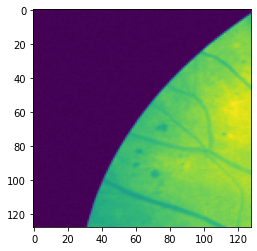

In [19]:
plt.imshow(orig_images[0])

In [20]:
masks=np.array([get_data_gif(path) for path in mask])
masks.shape

(1170, 128, 128)

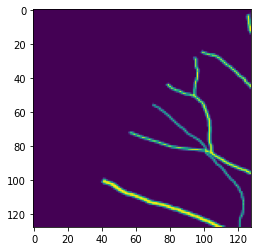

In [21]:
plt.imshow(masks[0])

In [22]:
orig_images = np.expand_dims(orig_images, axis = -1)
masks = np.expand_dims(masks, axis = -1)

In [23]:
masks.shape, orig_images.shape

((1170, 128, 128, 1), (1170, 128, 128, 1))

In [24]:
orig_images = orig_images / 255
masks = masks / 255

In [25]:
def get_unet():
    inputs = Input((128, 128, 1))
    conv1 = Conv2D(32, (3, 3), activation='relu', padding='same')(inputs)
    conv1 = Conv2D(32, (3, 3), activation='relu', padding='same')(conv1)
    pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)

    conv2 = Conv2D(64, (3, 3), activation='relu', padding='same')(pool1)
    conv2 = Conv2D(64, (3, 3), activation='relu', padding='same')(conv2)
    pool2 = MaxPooling2D(pool_size=(2, 2))(conv2)

    conv3 = Conv2D(128, (3, 3), activation='relu', padding='same')(pool2)
    conv3 = Conv2D(128, (3, 3), activation='relu', padding='same')(conv3)
    pool3 = MaxPooling2D(pool_size=(2, 2))(conv3)

    conv4 = Conv2D(256, (3, 3), activation='relu', padding='same')(pool3)
    conv4 = Conv2D(256, (3, 3), activation='relu', padding='same')(conv4)
    pool4 = MaxPooling2D(pool_size=(2, 2))(conv4)

    conv5 = Conv2D(512, (3, 3), activation='relu', padding='same')(pool4)
    conv5 = Conv2D(512, (3, 3), activation='relu', padding='same')(conv5)

    up6 = concatenate([Conv2DTranspose(256, (2, 2), strides=(2, 2), padding='same')(conv5), conv4], axis=3)
    conv6 = Conv2D(256, (3, 3), activation='relu', padding='same')(up6)
    conv6 = Conv2D(256, (3, 3), activation='relu', padding='same')(conv6)

    up7 = concatenate([Conv2DTranspose(128, (2, 2), strides=(2, 2), padding='same')(conv6), conv3], axis=3)
    conv7 = Conv2D(128, (3, 3), activation='relu', padding='same')(up7)
    conv7 = Conv2D(128, (3, 3), activation='relu', padding='same')(conv7)

    up8 = concatenate([Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same')(conv7), conv2], axis=3)
    conv8 = Conv2D(64, (3, 3), activation='relu', padding='same')(up8)
    conv8 = Conv2D(64, (3, 3), activation='relu', padding='same')(conv8)

    up9 = concatenate([Conv2DTranspose(32, (2, 2), strides=(2, 2), padding='same')(conv8), conv1], axis=3)
    conv9 = Conv2D(32, (3, 3), activation='relu', padding='same')(up9)
    conv9 = Conv2D(32, (3, 3), activation='relu', padding='same')(conv9)

    conv10 = Conv2D(1, (1, 1), activation='sigmoid')(conv9)

    model = Model(inputs=[inputs], outputs=[conv10])

    model.compile(optimizer=Adam(lr=1e-4), loss='binary_crossentropy', metrics=['accuracy'])
    model.summary()
    return model

In [26]:
model = get_unet()

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 128, 128, 1)  0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 128, 128, 32) 320         input_1[0][0]                    
__________________________________________________________________________________________________
conv2d_2 (Conv2D)               (None, 128, 128, 32) 9248        conv2d_1[0][0]                   
__________________________________________________________________________________________________
max_pooling2d_1 (MaxPooling2D)  (None, 64, 64, 32)   0           conv2d_2[0][0]                  

In [27]:
model.fit(orig_images, masks, epochs = 500, batch_size= 32, shuffle = True, validation_split = 0.1)

Train on 1053 samples, validate on 117 samples
Epoch 1/500
1053/1053 [==============================] - 143s 136ms/step - loss: 0.6133 - accuracy: 0.7959 - val_loss: 0.4037 - val_accuracy: 0.8456
Epoch 2/500
1053/1053 [==============================] - 140s 133ms/step - loss: 0.3455 - accuracy: 0.8160 - val_loss: 0.2317 - val_accuracy: 0.8456
Epoch 3/500
1053/1053 [==============================] - 140s 133ms/step - loss: 0.2414 - accuracy: 0.8160 - val_loss: 0.1891 - val_accuracy: 0.8456
Epoch 4/500
1053/1053 [==============================] - 143s 136ms/step - loss: 0.2290 - accuracy: 0.8160 - val_loss: 0.1849 - val_accuracy: 0.8456
Epoch 5/500
1053/1053 [==============================] - 142s 135ms/step - loss: 0.2261 - accuracy: 0.8160 - val_loss: 0.1839 - val_accuracy: 0.8456
Epoch 6/500
1053/1053 [==============================] - 140s 133ms/step - loss: 0.2242 - accuracy: 0.8160 - val_loss: 0.1813 - val_accuracy: 0.8456
Epoch 7/500
1053/1053 [==============================] - 14

1053/1053 [==============================] - 146s 139ms/step - loss: 0.1064 - accuracy: 0.8225 - val_loss: 0.0932 - val_accuracy: 0.8447
Epoch 56/500
1053/1053 [==============================] - 146s 139ms/step - loss: 0.1066 - accuracy: 0.8224 - val_loss: 0.0895 - val_accuracy: 0.8463
Epoch 57/500
1053/1053 [==============================] - 148s 141ms/step - loss: 0.1051 - accuracy: 0.8226 - val_loss: 0.0908 - val_accuracy: 0.8466
Epoch 58/500
1053/1053 [==============================] - 150s 142ms/step - loss: 0.1057 - accuracy: 0.8225 - val_loss: 0.0934 - val_accuracy: 0.8461
Epoch 59/500
1053/1053 [==============================] - 150s 142ms/step - loss: 0.1050 - accuracy: 0.8226 - val_loss: 0.0893 - val_accuracy: 0.8460
Epoch 60/500
1053/1053 [==============================] - 148s 141ms/step - loss: 0.1039 - accuracy: 0.8227 - val_loss: 0.0922 - val_accuracy: 0.8454
Epoch 61/500
1053/1053 [==============================] - 148s 140ms/step - loss: 0.1037 - accuracy: 0.8227 - val

1053/1053 [==============================] - 165s 157ms/step - loss: 0.0815 - accuracy: 0.8241 - val_loss: 0.1011 - val_accuracy: 0.8457
Epoch 110/500
1053/1053 [==============================] - 173s 165ms/step - loss: 0.0814 - accuracy: 0.8241 - val_loss: 0.1029 - val_accuracy: 0.8451
Epoch 111/500
1053/1053 [==============================] - 180s 171ms/step - loss: 0.0812 - accuracy: 0.8241 - val_loss: 0.1014 - val_accuracy: 0.8453
Epoch 112/500
1053/1053 [==============================] - 170s 161ms/step - loss: 0.0805 - accuracy: 0.8241 - val_loss: 0.1030 - val_accuracy: 0.8447
Epoch 113/500
1053/1053 [==============================] - 161s 152ms/step - loss: 0.0802 - accuracy: 0.8241 - val_loss: 0.1047 - val_accuracy: 0.8458
Epoch 114/500
1053/1053 [==============================] - 164s 156ms/step - loss: 0.0793 - accuracy: 0.8241 - val_loss: 0.1017 - val_accuracy: 0.8451
Epoch 115/500
1053/1053 [==============================] - 166s 157ms/step - loss: 0.0791 - accuracy: 0.8241

1053/1053 [==============================] - 137s 130ms/step - loss: 0.0655 - accuracy: 0.8243 - val_loss: 0.1185 - val_accuracy: 0.8440
Epoch 164/500
1053/1053 [==============================] - 137s 130ms/step - loss: 0.0641 - accuracy: 0.8243 - val_loss: 0.1194 - val_accuracy: 0.8448
Epoch 165/500
1053/1053 [==============================] - 136s 130ms/step - loss: 0.0638 - accuracy: 0.8243 - val_loss: 0.1187 - val_accuracy: 0.8439
Epoch 166/500
1053/1053 [==============================] - 137s 130ms/step - loss: 0.0633 - accuracy: 0.8244 - val_loss: 0.1200 - val_accuracy: 0.8444
Epoch 167/500
1053/1053 [==============================] - 136s 130ms/step - loss: 0.0649 - accuracy: 0.8243 - val_loss: 0.1194 - val_accuracy: 0.8427
Epoch 168/500
1053/1053 [==============================] - 137s 130ms/step - loss: 0.0644 - accuracy: 0.8243 - val_loss: 0.1199 - val_accuracy: 0.8443
Epoch 169/500
1053/1053 [==============================] - 144s 137ms/step - loss: 0.0632 - accuracy: 0.8244

1053/1053 [==============================] - 142s 135ms/step - loss: 0.0574 - accuracy: 0.8244 - val_loss: 0.1228 - val_accuracy: 0.8435
Epoch 218/500
1053/1053 [==============================] - 142s 134ms/step - loss: 0.0573 - accuracy: 0.8244 - val_loss: 0.1230 - val_accuracy: 0.8440
Epoch 219/500
1053/1053 [==============================] - 142s 134ms/step - loss: 0.0572 - accuracy: 0.8244 - val_loss: 0.1229 - val_accuracy: 0.8441
Epoch 220/500
1053/1053 [==============================] - 142s 134ms/step - loss: 0.0572 - accuracy: 0.8244 - val_loss: 0.1224 - val_accuracy: 0.8446
Epoch 221/500
1053/1053 [==============================] - 142s 134ms/step - loss: 0.0573 - accuracy: 0.8244 - val_loss: 0.1222 - val_accuracy: 0.8445
Epoch 222/500
1053/1053 [==============================] - 142s 135ms/step - loss: 0.0572 - accuracy: 0.8244 - val_loss: 0.1221 - val_accuracy: 0.8440
Epoch 223/500
1053/1053 [==============================] - 142s 135ms/step - loss: 0.0572 - accuracy: 0.8244

1053/1053 [==============================] - 153s 145ms/step - loss: 0.0551 - accuracy: 0.8244 - val_loss: 0.1209 - val_accuracy: 0.8436
Epoch 272/500
1053/1053 [==============================] - 153s 145ms/step - loss: 0.0554 - accuracy: 0.8244 - val_loss: 0.1208 - val_accuracy: 0.8445
Epoch 273/500
1053/1053 [==============================] - 154s 146ms/step - loss: 0.0553 - accuracy: 0.8244 - val_loss: 0.1205 - val_accuracy: 0.8442
Epoch 274/500
1053/1053 [==============================] - 153s 145ms/step - loss: 0.0550 - accuracy: 0.8244 - val_loss: 0.1210 - val_accuracy: 0.8438
Epoch 275/500
1053/1053 [==============================] - 153s 145ms/step - loss: 0.0549 - accuracy: 0.8244 - val_loss: 0.1214 - val_accuracy: 0.8443
Epoch 276/500
1053/1053 [==============================] - 153s 146ms/step - loss: 0.0548 - accuracy: 0.8244 - val_loss: 0.1220 - val_accuracy: 0.8446
Epoch 277/500
1053/1053 [==============================] - 154s 146ms/step - loss: 0.0549 - accuracy: 0.8244

1053/1053 [==============================] - 168s 160ms/step - loss: 0.0534 - accuracy: 0.8244 - val_loss: 0.1217 - val_accuracy: 0.8442
Epoch 326/500
1053/1053 [==============================] - 168s 160ms/step - loss: 0.0539 - accuracy: 0.8244 - val_loss: 0.1188 - val_accuracy: 0.8441
Epoch 327/500
1053/1053 [==============================] - 168s 160ms/step - loss: 0.0542 - accuracy: 0.8244 - val_loss: 0.1195 - val_accuracy: 0.8445
Epoch 328/500
1053/1053 [==============================] - 165s 157ms/step - loss: 0.0542 - accuracy: 0.8244 - val_loss: 0.1205 - val_accuracy: 0.8441
Epoch 329/500
1053/1053 [==============================] - 174s 165ms/step - loss: 0.0537 - accuracy: 0.8244 - val_loss: 0.1201 - val_accuracy: 0.8444
Epoch 330/500
1053/1053 [==============================] - 170s 162ms/step - loss: 0.0534 - accuracy: 0.8244 - val_loss: 0.1207 - val_accuracy: 0.8442
Epoch 331/500
1053/1053 [==============================] - 169s 161ms/step - loss: 0.0532 - accuracy: 0.8244

1053/1053 [==============================] - 146s 139ms/step - loss: 0.0527 - accuracy: 0.8244 - val_loss: 0.1198 - val_accuracy: 0.8446
Epoch 380/500
1053/1053 [==============================] - 146s 139ms/step - loss: 0.0526 - accuracy: 0.8244 - val_loss: 0.1201 - val_accuracy: 0.8441
Epoch 381/500
1053/1053 [==============================] - 146s 139ms/step - loss: 0.0525 - accuracy: 0.8244 - val_loss: 0.1202 - val_accuracy: 0.8443
Epoch 382/500
1053/1053 [==============================] - 146s 138ms/step - loss: 0.0524 - accuracy: 0.8244 - val_loss: 0.1210 - val_accuracy: 0.8439
Epoch 383/500
1053/1053 [==============================] - 145s 138ms/step - loss: 0.0524 - accuracy: 0.8244 - val_loss: 0.1208 - val_accuracy: 0.8434
Epoch 384/500
1053/1053 [==============================] - 146s 139ms/step - loss: 0.0527 - accuracy: 0.8244 - val_loss: 0.1206 - val_accuracy: 0.8440
Epoch 385/500
1053/1053 [==============================] - 146s 139ms/step - loss: 0.0529 - accuracy: 0.8244

1053/1053 [==============================] - 140s 133ms/step - loss: 0.0531 - accuracy: 0.8244 - val_loss: 0.1171 - val_accuracy: 0.8440
Epoch 434/500
1053/1053 [==============================] - 140s 133ms/step - loss: 0.0526 - accuracy: 0.8244 - val_loss: 0.1183 - val_accuracy: 0.8441
Epoch 435/500
1053/1053 [==============================] - 141s 134ms/step - loss: 0.0521 - accuracy: 0.8244 - val_loss: 0.1199 - val_accuracy: 0.8451
Epoch 436/500
1053/1053 [==============================] - 140s 133ms/step - loss: 0.0519 - accuracy: 0.8244 - val_loss: 0.1205 - val_accuracy: 0.8443
Epoch 437/500
1053/1053 [==============================] - 141s 134ms/step - loss: 0.0517 - accuracy: 0.8244 - val_loss: 0.1189 - val_accuracy: 0.8440
Epoch 438/500
1053/1053 [==============================] - 141s 134ms/step - loss: 0.0516 - accuracy: 0.8244 - val_loss: 0.1205 - val_accuracy: 0.8442
Epoch 439/500
1053/1053 [==============================] - 141s 134ms/step - loss: 0.0514 - accuracy: 0.8244

1053/1053 [==============================] - 143s 136ms/step - loss: 0.0507 - accuracy: 0.8244 - val_loss: 0.1196 - val_accuracy: 0.8445
Epoch 488/500
1053/1053 [==============================] - 147s 139ms/step - loss: 0.0507 - accuracy: 0.8244 - val_loss: 0.1202 - val_accuracy: 0.8443
Epoch 489/500
1053/1053 [==============================] - 145s 138ms/step - loss: 0.0506 - accuracy: 0.8244 - val_loss: 0.1205 - val_accuracy: 0.8444
Epoch 490/500
1053/1053 [==============================] - 147s 140ms/step - loss: 0.0506 - accuracy: 0.8244 - val_loss: 0.1201 - val_accuracy: 0.8444
Epoch 491/500
1053/1053 [==============================] - 148s 140ms/step - loss: 0.0506 - accuracy: 0.8244 - val_loss: 0.1203 - val_accuracy: 0.8444
Epoch 492/500
1053/1053 [==============================] - 142s 135ms/step - loss: 0.0506 - accuracy: 0.8244 - val_loss: 0.1207 - val_accuracy: 0.8443
Epoch 493/500
1053/1053 [==============================] - 141s 134ms/step - loss: 0.0506 - accuracy: 0.8244

In [28]:
PATH_DRIVE= 'All_3//DRIVE//test'

In [29]:
t_images_DRIVE=glob.glob(os.path.join(PATH_DRIVE,'images','*.TIF'))

In [30]:
if not os.path.exists('.All_3/test/output_images'):
    os.makedirs('./All_3/test/output_images')
src = "./All_3/DRIVE/test/images/"
dst = "./All_3/test/output_images/"

In [31]:
cropheight=200
cropwidth = 200
k=-1
for file in t_images_DRIVE:
    k+=1
    im = Image.open(t_images_DRIVE[k])
    width, height = im.size
    for i in range(0, width, cropwidth):
     for j in range(0, height, cropheight): 
       box = (i, j,i+cropwidth, j+cropheight)
       print('%s %s' % (t_images_DRIVE[k], box))
       im.crop(box).save('%s.width%03d.height%03d.tiff' % (t_images_DRIVE[k], i, j))
       files = [i for i in os.listdir(src) if i.endswith(".tiff") and path.isfile(path.join(src, i))]
       for f in files:
        shutil.move(path.join(src, f), dst)

All_3//DRIVE//test\images\01_test.tif (0, 0, 200, 200)
All_3//DRIVE//test\images\01_test.tif (0, 200, 200, 400)
All_3//DRIVE//test\images\01_test.tif (0, 400, 200, 600)
All_3//DRIVE//test\images\01_test.tif (200, 0, 400, 200)
All_3//DRIVE//test\images\01_test.tif (200, 200, 400, 400)
All_3//DRIVE//test\images\01_test.tif (200, 400, 400, 600)
All_3//DRIVE//test\images\01_test.tif (400, 0, 600, 200)
All_3//DRIVE//test\images\01_test.tif (400, 200, 600, 400)
All_3//DRIVE//test\images\01_test.tif (400, 400, 600, 600)
All_3//DRIVE//test\images\02_test.tif (0, 0, 200, 200)
All_3//DRIVE//test\images\02_test.tif (0, 200, 200, 400)
All_3//DRIVE//test\images\02_test.tif (0, 400, 200, 600)
All_3//DRIVE//test\images\02_test.tif (200, 0, 400, 200)
All_3//DRIVE//test\images\02_test.tif (200, 200, 400, 400)
All_3//DRIVE//test\images\02_test.tif (200, 400, 400, 600)
All_3//DRIVE//test\images\02_test.tif (400, 0, 600, 200)
All_3//DRIVE//test\images\02_test.tif (400, 200, 600, 400)
All_3//DRIVE//test\im

All_3//DRIVE//test\images\18_test.tif (200, 400, 400, 600)
All_3//DRIVE//test\images\18_test.tif (400, 0, 600, 200)
All_3//DRIVE//test\images\18_test.tif (400, 200, 600, 400)
All_3//DRIVE//test\images\18_test.tif (400, 400, 600, 600)
All_3//DRIVE//test\images\19_test.tif (0, 0, 200, 200)
All_3//DRIVE//test\images\19_test.tif (0, 200, 200, 400)
All_3//DRIVE//test\images\19_test.tif (0, 400, 200, 600)
All_3//DRIVE//test\images\19_test.tif (200, 0, 400, 200)
All_3//DRIVE//test\images\19_test.tif (200, 200, 400, 400)
All_3//DRIVE//test\images\19_test.tif (200, 400, 400, 600)
All_3//DRIVE//test\images\19_test.tif (400, 0, 600, 200)
All_3//DRIVE//test\images\19_test.tif (400, 200, 600, 400)
All_3//DRIVE//test\images\19_test.tif (400, 400, 600, 600)
All_3//DRIVE//test\images\20_test.tif (0, 0, 200, 200)
All_3//DRIVE//test\images\20_test.tif (0, 200, 200, 400)
All_3//DRIVE//test\images\20_test.tif (0, 400, 200, 600)
All_3//DRIVE//test\images\20_test.tif (200, 0, 400, 200)
All_3//DRIVE//test\im

In [32]:
PATH_ChaseDB= 'All_3//ChaseDB//test'

In [33]:
t_images_ChaseDB=glob.glob(os.path.join(PATH_ChaseDB,'images','*.JPG'))

In [34]:
src = "./All_3/ChaseDB/test/images/"
dst = "./All_3/test/output_images/"

In [35]:
cropheight=350
cropwidth = 350
k=-1
for file in t_images_ChaseDB:
    k+=1
    im = Image.open(t_images_ChaseDB[k])
    width, height = im.size
    for i in range(0, width, cropwidth):
     for j in range(0, height, cropheight): 
       box = (i, j,i+cropwidth, j+cropheight)
       print('%s %s' % (t_images_ChaseDB[k], box))
       im.crop(box).save('%s.width%03d.height%03d.tiff' % (t_images_ChaseDB[k], i, j))
       files = [i for i in os.listdir(src) if i.endswith(".tiff") and path.isfile(path.join(src, i))]
       for f in files:
        shutil.move(path.join(src, f), dst)

All_3//ChaseDB//test\images\Image_14L.jpg (0, 0, 350, 350)
All_3//ChaseDB//test\images\Image_14L.jpg (0, 350, 350, 700)
All_3//ChaseDB//test\images\Image_14L.jpg (0, 700, 350, 1050)
All_3//ChaseDB//test\images\Image_14L.jpg (350, 0, 700, 350)
All_3//ChaseDB//test\images\Image_14L.jpg (350, 350, 700, 700)
All_3//ChaseDB//test\images\Image_14L.jpg (350, 700, 700, 1050)
All_3//ChaseDB//test\images\Image_14L.jpg (700, 0, 1050, 350)
All_3//ChaseDB//test\images\Image_14L.jpg (700, 350, 1050, 700)
All_3//ChaseDB//test\images\Image_14L.jpg (700, 700, 1050, 1050)
All_3//ChaseDB//test\images\Image_14R.jpg (0, 0, 350, 350)
All_3//ChaseDB//test\images\Image_14R.jpg (0, 350, 350, 700)
All_3//ChaseDB//test\images\Image_14R.jpg (0, 700, 350, 1050)
All_3//ChaseDB//test\images\Image_14R.jpg (350, 0, 700, 350)
All_3//ChaseDB//test\images\Image_14R.jpg (350, 350, 700, 700)
All_3//ChaseDB//test\images\Image_14R.jpg (350, 700, 700, 1050)
All_3//ChaseDB//test\images\Image_14R.jpg (700, 0, 1050, 350)
All_3//

In [36]:
PATH_HRF= 'All_3//HRF//test'

In [37]:
t_images_HRF=glob.glob(os.path.join(PATH_HRF,'images','*.jpg'))

In [38]:
src = "./All_3/HRF/test/images/"
dst = "./All_3/test/output_images/"

In [39]:
cropheight=900
cropwidth = 600
k=-1
for file in t_images_HRF:
    k+=1
    im = Image.open(t_images_HRF[k])
    width, height = im.size
    for i in range(0, width, cropwidth):
     for j in range(0, height, cropheight): 
       box = (i, j,i+cropwidth, j+cropheight)
       print('%s %s' % (t_images_HRF[k], box))
       im.crop(box).save('%s.width%03d.height%03d.tiff' % (t_images_HRF[k], i, j))
       files = [i for i in os.listdir(src) if i.endswith(".tiff") and path.isfile(path.join(src, i))]
       for f in files:
        shutil.move(path.join(src, f), dst)

All_3//HRF//test\images\15_dr.JPG (0, 0, 600, 900)
All_3//HRF//test\images\15_dr.JPG (0, 900, 600, 1800)
All_3//HRF//test\images\15_dr.JPG (0, 1800, 600, 2700)
All_3//HRF//test\images\15_dr.JPG (600, 0, 1200, 900)
All_3//HRF//test\images\15_dr.JPG (600, 900, 1200, 1800)
All_3//HRF//test\images\15_dr.JPG (600, 1800, 1200, 2700)
All_3//HRF//test\images\15_dr.JPG (1200, 0, 1800, 900)
All_3//HRF//test\images\15_dr.JPG (1200, 900, 1800, 1800)
All_3//HRF//test\images\15_dr.JPG (1200, 1800, 1800, 2700)
All_3//HRF//test\images\15_dr.JPG (1800, 0, 2400, 900)
All_3//HRF//test\images\15_dr.JPG (1800, 900, 2400, 1800)
All_3//HRF//test\images\15_dr.JPG (1800, 1800, 2400, 2700)
All_3//HRF//test\images\15_dr.JPG (2400, 0, 3000, 900)
All_3//HRF//test\images\15_dr.JPG (2400, 900, 3000, 1800)
All_3//HRF//test\images\15_dr.JPG (2400, 1800, 3000, 2700)
All_3//HRF//test\images\15_dr.JPG (3000, 0, 3600, 900)
All_3//HRF//test\images\15_dr.JPG (3000, 900, 3600, 1800)
All_3//HRF//test\images\15_dr.JPG (3000, 1

In [40]:
PATH2 = 'All_3//test'

In [41]:
t_images=glob.glob(os.path.join(PATH2,'output_images','*.tiff'))

In [42]:
test_images=np.array([get_data(path) for path in t_images])
test_images.shape

(252, 128, 128)

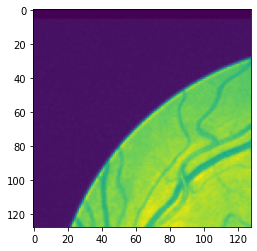

In [43]:
plt.imshow(test_images[0])

In [44]:
test_images = np.expand_dims(test_images, axis = -1)

In [45]:
test_images.shape

(252, 128, 128, 1)

In [46]:
test_images = test_images / 255

In [47]:
imgs_mask_test = model.predict(test_images, verbose=1)

252/252 [==============================] - 8s 30ms/step


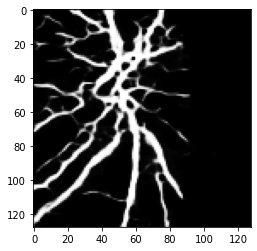

In [49]:
idx = random.randint(0, len(imgs_mask_test))
i = imgs_mask_test[idx]
i = i[:, :, 0]
i.shape
plt.imshow(i, cmap='gray')
plt.imsave('filename.png', i, cmap='gray')

In [50]:
yp = np.round(imgs_mask_test,0)

In [51]:
idx = random.randint(0, len(yp))
i = imgs_mask_test[idx]
i = i[:, :, 0]
i.shape

(128, 128)

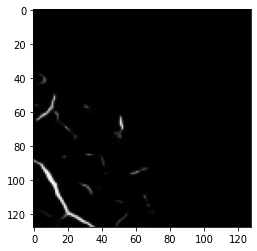

In [52]:
plt.imshow(i, cmap='gray')


In [53]:
PATH3 = 'Stare'

In [54]:
s_images=glob.glob(os.path.join(PATH3,'images','*.tiff'))
s_mask=glob.glob(os.path.join(PATH3,'1st_manual','*.GIF'))

In [55]:
if not os.path.exists('./Stare/out_images'):
    os.makedirs('./Stare/out_images')
src2 = "./Stare/images/"
dst2 = "./Stare/out_images/"
if not os.path.exists('./Stare/out_1st_manual'):
    os.makedirs('./Stare/out_1st_manual')
src3= "./Stare/1st_manual/"
dst3 = "./Stare/out_1st_manual/"

In [56]:
cropheight=350
cropwidth = 350
k=-1
for file in s_images:
    k+=1
    im = Image.open(s_images[k])
    width, height = im.size
    for i in range(0, width, cropwidth):
     for j in range(0, height, cropheight): 
       box = (i, j,i+cropwidth, j+cropheight)
       print('%s %s' % (s_images[k], box))
       im.crop(box).save('%s.width%03d.height%03d.tif' % (s_images[k], i, j))
       files = [i for i in os.listdir(src2) if i.endswith(".tif") and path.isfile(path.join(src2, i))]
       for f in files:
        shutil.move(path.join(src2, f), dst2)

In [57]:
cropheight=350
cropwidth = 350
k=-1
for file in s_mask:
    k+=1
    im = Image.open(s_mask[k])
    width, height = im.size
    for i in range(0, width, cropwidth):
     for j in range(0, height, cropheight): 
       box = (i, j,i+cropwidth, j+cropheight)
       print('%s %s' % (s_mask[k], box))
       im.crop(box).save('%s.width%03d.height%03d.tif' % (s_mask[k], i, j))
       files = [i for i in os.listdir(src3) if i.endswith(".tif") and path.isfile(path.join(src3, i))]
       for f in files:
        shutil.move(path.join(src3, f), dst3)

Stare\1st_manual\41_manual1.gif (0, 0, 350, 350)
Stare\1st_manual\41_manual1.gif (0, 350, 350, 700)
Stare\1st_manual\41_manual1.gif (350, 0, 700, 350)
Stare\1st_manual\41_manual1.gif (350, 350, 700, 700)
Stare\1st_manual\42_manual1.gif (0, 0, 350, 350)
Stare\1st_manual\42_manual1.gif (0, 350, 350, 700)
Stare\1st_manual\42_manual1.gif (350, 0, 700, 350)
Stare\1st_manual\42_manual1.gif (350, 350, 700, 700)
Stare\1st_manual\43_manual1.gif (0, 0, 350, 350)
Stare\1st_manual\43_manual1.gif (0, 350, 350, 700)
Stare\1st_manual\43_manual1.gif (350, 0, 700, 350)
Stare\1st_manual\43_manual1.gif (350, 350, 700, 700)
Stare\1st_manual\44_manual1.gif (0, 0, 350, 350)
Stare\1st_manual\44_manual1.gif (0, 350, 350, 700)
Stare\1st_manual\44_manual1.gif (350, 0, 700, 350)
Stare\1st_manual\44_manual1.gif (350, 350, 700, 700)
Stare\1st_manual\45_manual1.gif (0, 0, 350, 350)
Stare\1st_manual\45_manual1.gif (0, 350, 350, 700)
Stare\1st_manual\45_manual1.gif (350, 0, 700, 350)
Stare\1st_manual\45_manual1.gif (

In [58]:
PATH5 = 'Stare'

In [59]:
t_images=glob.glob(os.path.join(PATH5,'out_images','*.tif'))

In [60]:
t_mask=glob.glob(os.path.join(PATH5,'out_1st_manual','*.tif'))

In [61]:
test_images=np.array([get_data(path) for path in t_images])
test_images.shape

(0,)

In [62]:
plt.imshow(test_images[0])

IndexError: index 0 is out of bounds for axis 0 with size 0

In [ ]:
test_masks=np.array([get_data(path) for path in t_mask])
test_masks.shape

In [ ]:
test_images = np.expand_dims(test_images, axis = -1)

In [ ]:
test_masks = np.expand_dims(test_masks, axis = -1)

In [ ]:
test_images.shape

In [ ]:
test_masks.shape

In [ ]:
test_images = test_images / 255

In [ ]:
test_masks = test_masks / 255

In [ ]:
imgs_mask_test = model.predict(test_images, verbose=1)

In [ ]:
idx = random.randint(0, len(imgs_mask_test))
i = imgs_mask_test[idx]
i = i[:, :, 0]
i.shape

In [ ]:
plt.imshow(i, cmap='gray')

In [ ]:
yp = np.round(imgs_mask_test,0)

In [ ]:
idx = random.randint(0, len(yp))
i = imgs_mask_test[idx]
i = i[:, :, 0]
i.shape

In [ ]:
plt.imshow(i, cmap='gray')
plt.imsave('drive.png', i, cmap='gray')

In [ ]:
plt.imshow(imgs_mask_test[1], cmap='gray')

In [ ]:
score= model.evaluate(test_masks,imgs_mask_test, verbose=1)

In [ ]:
print('Test loss:', score[0]) 
print('Test accuracy:', score[1])

In [ ]:
np.min(test_images)

In [ ]:
np.max(test_images)

In [ ]:
np.min(test_masks)

In [ ]:
np.max(test_masks)

In [ ]:
np.min(imgs_mask_test)

In [ ]:
np.max(imgs_mask_test)

In [ ]:
imgs_mask_test = model.predict(test_images, verbose=1)

In [ ]:
if not os.path.exists('./Stare/predict'):
    os.makedirs('./Stare/predict')
src4= "./Stare/1st_manual/"
dst4 = "./Stare/predict/"

In [ ]:
idx = random.randint(0, len(imgs_mask_test))
i = imgs_mask_test[idx]
i = i[:, :, 0]
i.shape
plt.imshow(i, cmap='gray')
plt.imsave('filename.png', i, cmap='gray')

In [ ]:
plt.imshow(imgs_mask_test[0], cmap='gray')

In [ ]:
plt.imshow(test_masks[0], cmap='gray')

In [ ]:
plt.imshow(imgs_mask_test[1], cmap='gray')

In [ ]:
plt.imshow(imgs_mask_test[2], cmap='gray')

In [ ]:
plt.imshow(imgs_mask_test[3], cmap='gray')

In [ ]:
idx = random.randint(0, len(imgs_mask_test))
i = imgs_mask_test[idx]
i = i[:, :, 0]
i.shape
plt.imshow(i, cmap='gray')
plt.imsave('filename.png', i, cmap='gray')

##### 